# Stereology Analysis Template

> **INFO**  
> This is the template for using the stereology module. The specific documentation can be found at the following link:  
> https://github.com/marcoalopez/GrainSizeTools/wiki/3.-Using-the-stereology-module 
>
> The template shows typical examples of using the stereology module with grain size populations and different strategies for presenting them. Modify, delete and add as necessary to create your own analysis procedure.

In [1]:
# Load the script. It is assumed that the notebook is in the same folder
# as the GrainSizeTools.py file, if not specify the full path to the file.
# e.g. %run filepath...\GrainSizeTools_script.py
%run GrainSizeTools_script.py

module plot imported
module averages imported
module stereology imported
module piezometers imported
module template imported

Welcome to GrainSizeTools script
A free open-source cross-platform script to visualize and characterize grain size
population and estimate differential stress via paleopizometers.

Version: 2024.03.RC
Documentation: https://github.com/marcoalopez/GrainSizeTools/wiki

Type get.functions_list() to get a list of the main methods



## Data reading

In [2]:
# specify the file(s) to be analysed here
dataset = pd.read_csv('DATA\data_set.txt', sep='\t')

In [3]:
# estimate Equivalent Circular Diameters based on areas (if neccesary)
dataset['diameters'] = 2 * np.sqrt(dataset['Area'] / np.pi)

# display a view of the dataset 
dataset

,Area,Circ,Feret,FeretX,FeretY,FeretAngle,MinFeret,AR,Round,Solidity,diameters
0,157.25,0.680,18.062,1535.0,0.5,131.634,13.500,1.101,0.908,0.937,14.149803
1,2059.75,0.771,62.097,753.5,16.5,165.069,46.697,1.314,0.761,0.972,51.210889
2,1961.50,0.842,57.871,727.0,65.0,71.878,46.923,1.139,0.878,0.972,49.974587
3,5428.50,0.709,114.657,1494.5,83.5,19.620,63.449,1.896,0.528,0.947,83.137121
4,374.00,0.699,29.262,2328.0,34.0,33.147,16.000,1.515,0.660,0.970,21.821815
...,...,...,...,...,...,...,...,...,...,...,...
2656,452.50,0.789,28.504,1368.0,1565.5,127.875,22.500,1.235,0.810,0.960,24.002935
2657,1081.25,0.756,47.909,1349.5,1569.5,108.246,31.363,1.446,0.692,0.960,37.103777
2658,513.50,0.720,32.962,1373.0,1586.0,112.286,20.496,1.493,0.670,0.953,25.569679
2659,277.75,0.627,29.436,1316.0,1601.5,159.102,17.002,1.727,0.579,0.920,18.805379


# Saltykov method

volume fraction (up to 50 microns) = 41.65 %
bin size = 14.24


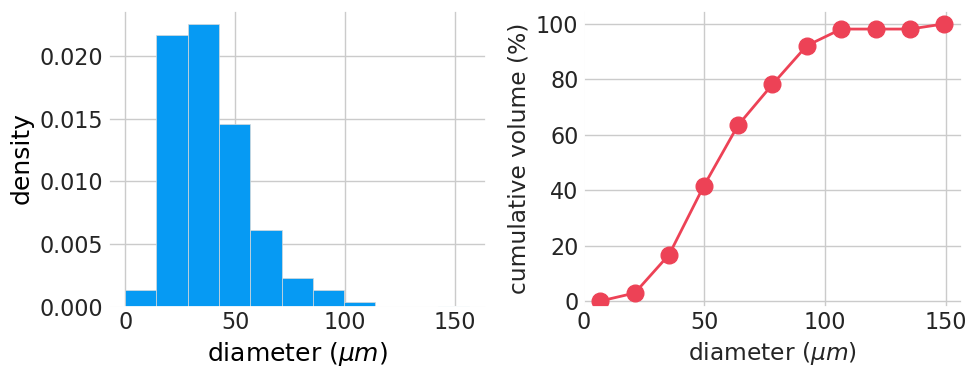

In [4]:
mid_points, densities = stereology.Saltykov(dataset['diameters'], numbins=11, calc_vol=50)

## The two-step method

PREDICTED OPTIMAL VALUES
Number of classes: 11
MSD (lognormal shape) = 1.63 ± 0.06
Geometric mean (scale) = 36.05 ± 1.27


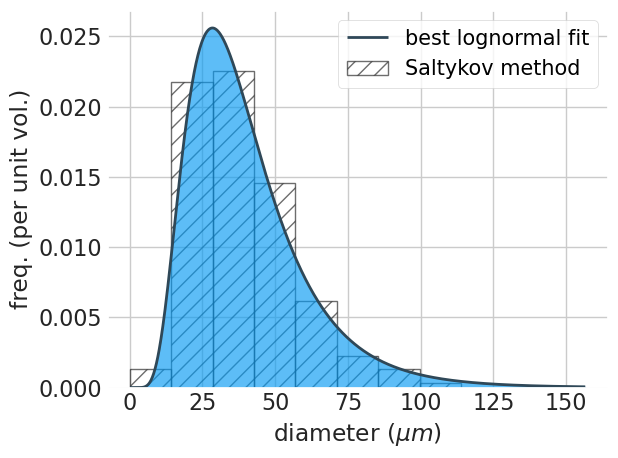

In [5]:
_ = stereology.two_step(dataset['diameters'])

## Estimation of volume fractions from a calculated lognormal distribution

In [6]:
# lognormal parameters
geomean = 36.05
std = np.log(1.63)

# set min and max grain size in the population
min_size = 0
max_size = dataset['diameters'].max()


# get the volume fraction of a specific grain size
stereology.calc_volume_fraction(lognorm_params=(geomean, std),
                                total_size_range=(min_size, max_size),
                                interest_size_range=(0, 50))

Volume fraction occupied by grains between 0 and 50 microns: 22.7 %


0.22693747883065515

In [7]:
stereology.calc_volume_fraction(lognorm_params=(geomean, std),
                                total_size_range=(min_size, max_size),
                                interest_size_range=(10, 80))

Volume fraction occupied by grains between 10 and 80 microns: 60.3 %


0.6030751209186476

In [8]:
# annotate the date you executed the notebook and the Python version 
import sys
from datetime import date    
today = date.today().isoformat()

print(f'Notebook last run in {today} using:')
print('Python', sys.version)

Notebook last run in 2024-05-17 using:
Python 3.10.13 | packaged by Anaconda, Inc. | (main, Sep 11 2023, 13:24:38) [MSC v.1916 64 bit (AMD64)]
